# Applications
- Trending topic detection
- Opinion mining
- Sentiment detection
- Rumor/fake news detection
- Adult content filtering
- Customer support

# Unique Challenges

The basic tenets of any language:
- Single language
- Single script
- Formal
- Gramatically correct
- Few or no spelling errors
- Mostly text-like (very few non-textual elements, such as emotions, images, smileys,etc.)

The challenges to NLP systems for social media text data (SMTD):
- No grammar
- Nonstandard spelling
- Multilingual
- Transliteration
- Special characters
- Ever-evolving vocabulary
- Length of text
- Noisy data

The spectrum of the formalism in text data where different sources of text data appear on it.
![alt text](https://learning.oreilly.com/library/view/practical-natural-language/9781492054047/assets/pnlp_0806.png)

> TIP: It's important to identify, understand, and address the language peculiarities found in SMTD. Building submodules that can handle these peculiarities often goes a long way toward improving the performance of models working with SMTD.

# Wordcloud

Step-by-step process:
1. Tokenize a given corpus or document
2. Remove stop words
3. Sort the remaining words in descending order of frequency
4. Take the top k words and plot them “aesthetically”

In [1]:
import pandas as pd
df_tweets = pd.read_csv("Data/sts_gold_tweet.csv", delimiter=";")

file = open("Data/Chapter4.txt", encoding="utf-8", mode="r")
ch4_raw = file.read()
file.close()

df_tweets.shape

(2034, 3)

In [2]:
# sampling 200-300 tweets
df_tweets = df_tweets.iloc[1750:]

# adding the 284 tweets into a list
corpus_split = list(df_tweets['tweet'])

# helper function which concatenates all the data into a single corpus
def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element)
    return result

corpus_twitter = concatenate_list_data(corpus_split)
# corpus_twitter[:10000]

In [3]:
# load text
# split into words by white space
ch4_raw = ch4_raw.split()
corpus_twitter = corpus_twitter.split()

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped_ch4 = [w.translate(table) for w in ch4_raw]
stripped_twitter = [w.translate(table) for w in corpus_twitter]

#detokenizing all the words(we could call our concatenate_list_data function here)
from nltk.tokenize.treebank import TreebankWordDetokenizer
# TreebankWordDetokenizer().detokenize(stripped_ch4)
# TreebankWordDetokenizer().detokenize(stripped_twitter)

#Appending all the data in the list to a string
string_ch4 = ' '
string_twitter = ' '
string_ch4 = string_ch4.join(stripped_ch4)
string_twitter = string_twitter.join(stripped_twitter)

In [4]:
#importing necessary NLTK packages

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')

#setting stopwords to english
stop_words = set(stopwords.words('english'))

#tokenizing the string
word_tokens_ch4 = word_tokenize(string_ch4)
word_tokens_twitter = word_tokenize(string_twitter)

#removing all the stop words
filtered_corpus_ch4 = [w for w in word_tokens_ch4 if not w in stop_words]
filtered_corpus_twitter = [w for w in word_tokens_twitter if not w in stop_words]

#calculating the frequency of each word
wordfreq_ch4=[filtered_corpus_ch4.count(p) for p in filtered_corpus_ch4]
result_ch4 = dict(zip(filtered_corpus_ch4,wordfreq_ch4))

wordfreq_twitter=[filtered_corpus_twitter.count(p) for p in filtered_corpus_twitter]
result_twitter = dict(zip(filtered_corpus_twitter,wordfreq_twitter))

[nltk_data] Downloading package stopwords to C:\Users\Yasir Abdur
[nltk_data]     Rohman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Yasir Abdur
[nltk_data]     Rohman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


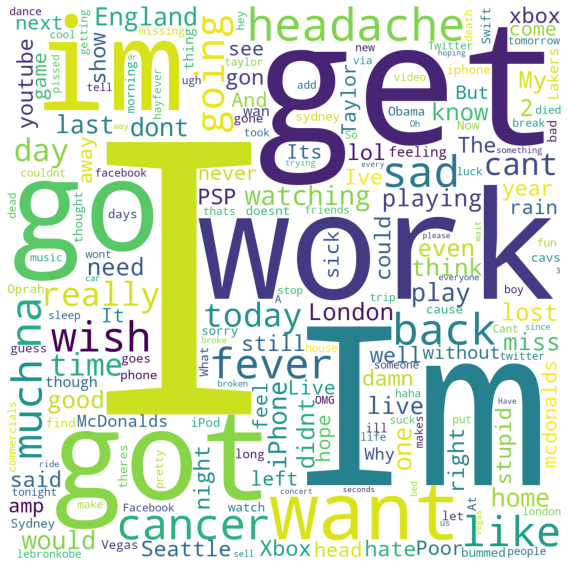

In [5]:
#finally lets plot the wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width = 1200, height = 1200, background_color="white",min_font_size =10).generate_from_frequencies(result_twitter)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
  
plt.show()

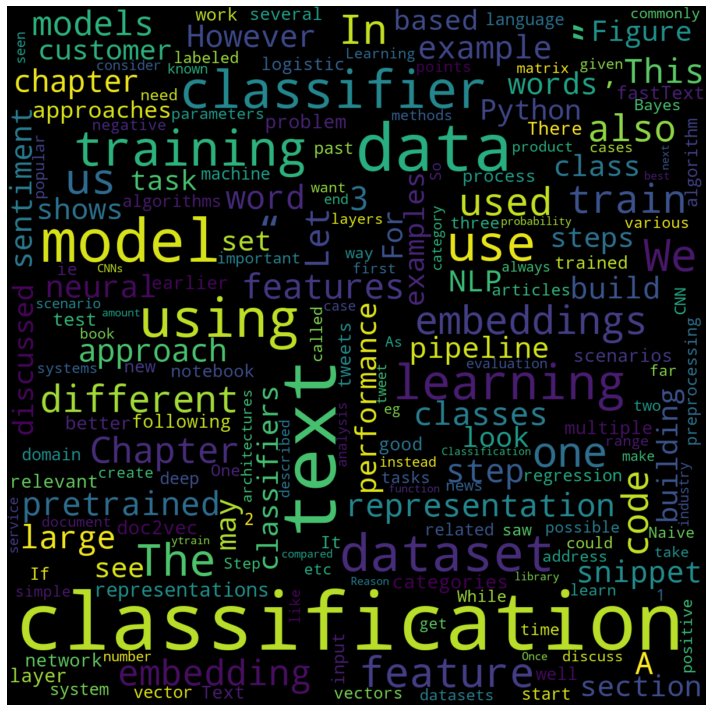

In [6]:
wordcloud = WordCloud(width = 1200, height = 1200, min_font_size =10).generate_from_frequencies(result_ch4)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout() 
  
plt.show()

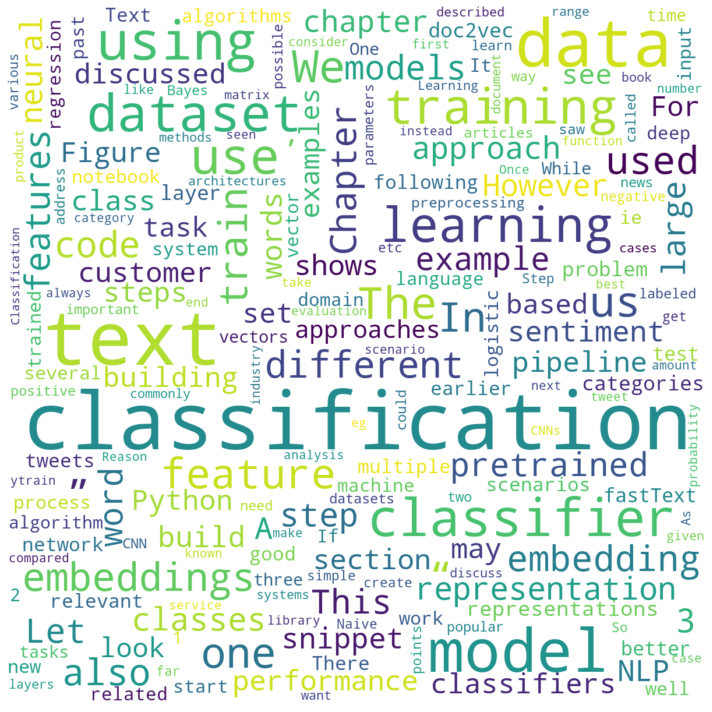

In [7]:
wordcloud = WordCloud(width = 1200, height = 1200,background_color="white", min_font_size =10).generate_from_frequencies(result_ch4)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout() 
  
plt.show()

In [8]:
# custom shape wordcloud
from PIL import Image
import numpy as np
import urllib
import requests


def generate_wordcloud(words, mask):
    wordcloud = WordCloud(width = 1200, height = 1200,background_color="white", min_font_size =10,mask=mask).generate_from_frequencies(words)    
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

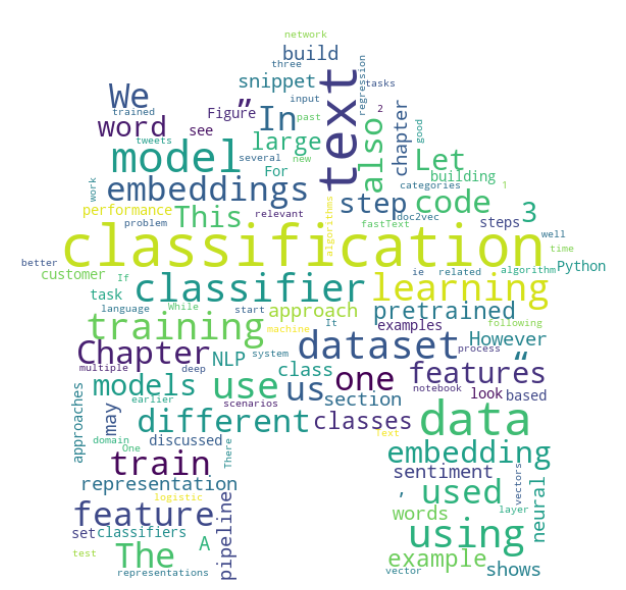

In [9]:
mask_house = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))
generate_wordcloud(result_ch4, mask_house)

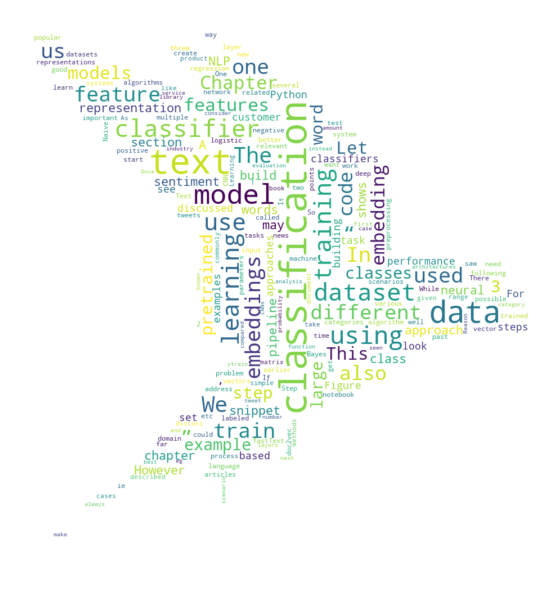

In [10]:
mask_circle = np.array(Image.open(requests.get('https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_960,f_auto/DCTM_Penguin_UK_DK_AL526630_wkmzns.jpg', stream=True).raw))
generate_wordcloud(result_ch4, mask_circle)

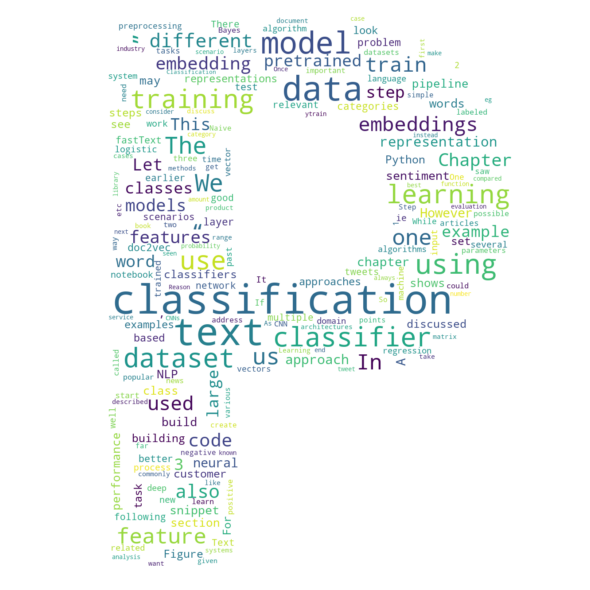

In [11]:
mask_p = np.array(Image.open(requests.get('https://previews.123rf.com/images/frescomovie/frescomovie1201/frescomovie120100042/11918955-letter-p-made-from-red-blood-cells-isolated-on-a-white-.jpg', stream=True).raw))
generate_wordcloud(result_ch4, mask_p)

# Tokenizer for SMTD

In [12]:
tweet3 = 'Tw33t a_!aa&!a?b #%lol # @dude_really #b3st_day $ad (b@e) (beep#d) @dude. 😀😀 !😀abc %😀lol #loveit #love.it $%&/ d*ck-'

In [13]:
import twikenizer as twk
twk = twk.Twikenizer()
print(twk.tokenize(tweet3))

['Tw33t', 'a', '_', '!', 'aa', '&', '!', 'a', '?', 'b', '#%lol', '#', '@dude_really', '#b3st_day', '$ad', '(', 'b', '@', 'e', ')', '(', 'beep', '#', 'd', ')', '@dude', '.', '😀', '😀', '!', '😀', 'abc', '%', '😀', 'lol', '#loveit', '#love', '.', 'it', '$', '%', '&', '/', 'd*ck', '-']


In [14]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
print(tknzr.tokenize(tweet3))

['Tw33t', 'a_', '!', 'aa', '&', '!', 'a', '?', 'b', '#', '%', 'lol', '#', '@dude_really', '#b3st_day', '$', 'ad', '(', 'b', '@e', ')', '(', 'beep', '#', 'd', ')', '@dude', '.', '😀', '😀', '!', '😀', 'abc', '%', '😀', 'lol', '#loveit', '#love', '.', 'it', '$', '%', '&', '/', 'd', '*', 'ck', '-']


# Trending Topics

We can use Tweepy, a free API, to get Twitter data. Unfortunately, Tweepy has rate limits.

In case we need to make calls beyond the rate limits, look at Gnip, a paid data hosepipe from Twitter.

In [15]:
%load_ext dotenv
%dotenv 

In [16]:
import tweepy, json
import os

#setting all the credentials of your twitter developer account
CONSUMER_KEY = os.getenv("CONSUMER_KEY")
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET")
ACCESS_KEY= os.getenv("ACCESS_KEY")
ACCESS_SECRET= os.getenv("ACCESS_SECRET")

# OAuth
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth)

In [17]:
#A WOEID (Where On Earth IDentifier) is a unique 32-bit reference identifier

WORLD_WOE_ID = 1
INDONESIA_WOE_ID = 23424846

#fetching trending topics in brazil 
indonesia_trends = api.trends_place(INDONESIA_WOE_ID)
trends = json.loads(json.dumps(indonesia_trends, indent=1))
 
indonesia_trend_list = [] 
for trend in trends[0]["trends"]:
    indonesia_trend_list.append(trend["name"].strip("#"))

#fetching trending topics in the world
world_trends = api.trends_place(WORLD_WOE_ID)
world_trends_json = json.loads(json.dumps(world_trends, indent=1))

world_trend_list=[] 
for trend in world_trends_json[0]["trends"]:
    world_trend_list.append(trend["name"].strip("#"))
    
# printing the topics which are trending in both WORLD and Indonesia 
print(set(world_trend_list).intersection(set(indonesia_trend_list)))

{'jype', 'Apologize to BTS', 'RACISM IS NOT AN OPINION', 'Bayern3Racist', 'DAY6', 'RassismusBeiBayern3', 'Bayern3Apologize'}


In [18]:
indonesia_trend_list

['Bayern3Racist',
 'RassismusBeiBayern3',
 'Apologize to BTS',
 'DAY6',
 'SUPERBAND_IS_COMING',
 'RACISM IS NOT AN OPINION',
 'Bayern3Apologize',
 'MenporaVaksinAtlet',
 'junghwan',
 'Jangan Bangunkan Macan Tidur',
 'jype',
 'Asahi',
 'TREASURE WEB DRAMA AUDITION',
 'Grammy',
 'SDGs Desa',
 'iKON ENGINE ON 0303',
 'opm tidak dibutuhkan',
 'mingyu',
 'Microsoft',
 'TOKOPEDIA WIB 90an',
 'bupati',
 'pledis',
 "THANK GOD IT'S DOYOUNG DAY",
 'Sungjin',
 'HYUNJIN BEST BOY',
 'KCON',
 'Emma Watson',
 'soobin',
 'WHYWHYWHY SOON',
 'Tirta',
 'SBYPanik',
 'demokratjuarakorupsi',
 'JumatBerkah',
 'MandiriMagabut',
 'HereForMew',
 'TolakLegalisasiMiras',
 'iKON_WhyWhyWhy_D5',
 '아이콘_왜왜왜_D5',
 'TogetherSpecial',
 'BTSZombieAU',
 'TreasureMap_Ep35',
 'UmatTerbaikTaatSyariah',
 'PakLurahPelanggarProkes',
 'SistemIslamSistemTerbaik',
 'OtsusHarusTepatSasaran',
 'DoyoungYouAreLoved',
 'KAIXGUCCI',
 'LoveAlarm2',
 '아이즈원',
 'JadilahPembelaIslam']

# Understanding Twitter Sentiment

> TIP: Pre-processing and data cleaning are crucial when working with SMTD. This step is likely to provide the most gains in model performance.

Pre-processing STMD:
- Removing markup elements, such as HTML, XML, XHTML
- Handling non-text data, such symbols, special characters
- Handling apostrophes, such ('s) to (is)
- Handling emojis, such as :penguin:, :penguin:, :penguin:
- Split-joined words
- Removal of URLs
- Nonstandard spellings, such as 'yessss', 'nooooo'

In [19]:
#load the dataset
import pandas as pd
df = pd.read_csv("Data/sts_gold_tweet.csv",error_bad_lines=False,delimiter=";")
print(df.columns)

#make a list of all the tweets
tweets_text_collection = list(df['tweet'])

Index(['id', 'polarity', 'tweet'], dtype='object')


In [20]:
from textblob import TextBlob
 
for i,tweet_text in enumerate(tweets_text_collection):
    print(tweet_text)
    analysis = TextBlob(tweet_text)
    print(analysis.sentiment)#analyse the sentitment
    # Polarity is a value between [-1.0, 1.0] and tells how positive or negative the text is. 
    # Subjectivity is within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
    print("-"*20)
    
    if i == 5: break

the angel is going to miss the athlete this weekend 
Sentiment(polarity=0.0, subjectivity=0.0)
--------------------
It looks as though Shaq is getting traded to Cleveland to play w/ LeBron... Too bad for Suns' fans. The Big Cactus is no more 
Sentiment(polarity=-0.3166666666666666, subjectivity=0.4222222222222222)
--------------------
@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH 
Sentiment(polarity=0.0, subjectivity=0.5)
--------------------
drinking a McDonalds coffee and not understanding why someone would hurt me for no apparent reason. 
Sentiment(polarity=-0.025, subjectivity=0.35)
--------------------
So dissapointed Taylor Swift doesnt have a Twitter 
Sentiment(polarity=0.0, subjectivity=0.0)
--------------------
Wishes I was on the Spring Fling Tour with Dawn &amp; neecee Sigh  G'knight
Sentiment(polarity=0.0, subjectivity=0.0)
--------------------


# Text Representation for SMTD

We don't use Google's Word2vec because its trained on Wikipedia and news articles. This is unlikely with our dataset from social media and the set difference will be pretty high.

How do we fix this?
1. Use pre-trained embeddings from social data, such as the ones from Stanford’s NLP group. They trained word embeddings on two billion tweets.
2. Use a better tokenizer. We highly recommend the twokenize tokenizer from Allen Ritter’s work
3. Train your own embeddings. This option should be the last resort and done only if you have lots and lots of data (at least 1 to 1.5 million tweets). Even after training your own embeddings, you may not get any considerable bump in performance metrics.

> TIP: In our experience, if you’re going for word-based embeddings, (1) and (2) can give you the best return on investment for your efforts.

No matter how good our word embeddings are, because of the **ever-evolving vocabulary of social media**, within a couple of months, our embeddings will become obsolete (i.e., a large portion of our vocabulary won’t be present in our word embeddings).

This will dramatically reduce the accuracy of our sentiment classifier with time, because with time, more and more words will end up getting ignored.

> TIP: Word embeddings are not the best way to represent SMTD, especially when you want to use them for more than four to six months.

One of the better ways to deal with this persistent OOV problem with SMTD is to use **character n-gram embeddings**.

In [21]:
import os
import sys
import pandas as pd
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

preprocessing_path = "smtd_preprocessing.py"
sys.path.append(os.path.abspath(preprocessing_path))
import smtd_preprocessing

... OK (Got response in 1.03 seconds)
Writing emoji data to C:\Users\Yasir Abdur Rohman\.demoji\codes.json ...
... OK


In [22]:
dir(smtd_preprocessing)

['Entity',
 'Punct',
 'PunctChars',
 'TweetTokenizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'deEmojify',
 'demoji',
 'identify_AlphaNumerics',
 'identify_Savings',
 'indentify_Money',
 'indentify_Offers',
 'indentify_Promos',
 'indentify_freebies',
 'neg_lookahead',
 'optional',
 'pos_lookahead',
 'printable',
 'process_BrandMentions',
 'process_BrandName',
 'process_Dates',
 'process_EmailIds',
 'process_HashTags',
 'process_Mentions',
 'process_NonBrandMentions',
 'process_Times',
 'process_TweetText',
 'process_URLs',
 'process_Websites',
 'prune_multple_consecutive_same_char',
 're',
 'regex_or',
 'remove_emoji',
 'remove_spl_words',
 'replace_numbers',
 'string',
 'strip_unicode',
 'strip_whiteSpaces',
 'to_LowerCase',
 'trim']

In [23]:
# read data
datapath = "Data/sts_gold_tweet.csv"
df = pd.read_csv(datapath, error_bad_lines=False,delimiter=";")
df.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [24]:
# pre-process
df['tweet'] = df['tweet'].apply(lambda x: smtd_preprocessing.process_TweetText(x))
df['tweet'] = df['tweet'].apply(lambda x: tweet_tokenizer.tokenize(x))
tweets = df['tweet'].values

In [25]:
# train embeddings CBOW
import time
start = time.time()
word2vec_tweet = Word2Vec(tweets,min_count=5, sg=0)
end = time.time()

print("CBOW Model Training Complete.\nTime taken for training is:{:.5f} sec ".format((end-start)))

CBOW Model Training Complete.
Time taken for training is:0.22010 sec 


In [26]:
#Summarize the loaded model
print("Summary of the model:", word2vec_tweet)

#Summarize vocabulary
words = list(word2vec_tweet.wv.vocab)
print("Small part of Vocabulary of our model:", words[:10])

#Acess vector for one word
print("Acess Vector for the word 'lol'", word2vec_tweet['lol'])

Summary of the model: Word2Vec(vocab=774, size=100, alpha=0.025)
Small part of Vocabulary of our model: ['the', 'is', 'going', 'to', 'miss', 'this', 'weekend', 'it', 'looks', 'as']
Acess Vector for the word 'lol' [ 0.04483686  0.04516923 -0.5450633   0.13927947 -0.1918851  -0.19061914
  0.05173401 -0.14521176 -0.36173606 -0.0405809   0.08421338 -0.15582153
  0.16749117  0.48225456  0.3746413   0.03879154 -0.31668898  0.14326459
  0.27541772 -0.20022276 -0.42422888  0.11555037 -0.01460975  0.2654774
  0.03665781 -0.3394075  -0.31657577  0.13879523 -0.19005965 -0.0234657
 -0.18430278 -0.34527108  0.18943223 -0.04039058  0.05356349 -0.27703592
  0.15139419 -0.13032432  0.15296507  0.12384362 -0.07455169  0.09642714
 -0.22113591 -0.01610674  0.22589447  0.01200476  0.233407    0.08884048
 -0.07975781  0.19644748  0.08582598 -0.17258592  0.57105273 -0.122551
  0.11653278  0.3110613   0.17376007  0.04053335  0.34823394 -0.08806708
 -0.01194018  0.1331152   0.2873859  -0.2043402   0.13563918 

In [27]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE

words_vocab= list(word2vec_tweet.wv.vocab)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words('english')
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words

Size of Vocabulary: 774
Few words in Vocabulary ['the', 'is', 'going', 'to', 'miss', 'this', 'weekend', 'it', 'looks', 'as', 'though', 'getting', 'play', 'w', '/', 'lebron', '..', 'too', 'bad', 'for', "'", 'fans', '.', 'big', 'no', 'more', 'constantnonbrandmention', 'constantdate', "isn't", 'coming', 'soon', 'enough', 'drinking', 'a', 'mcdonalds', 'coffee', 'and', 'not', 'why', 'someone', 'would', 'me', 'so', 'taylor', 'swift', 'doesnt', 'have', 'twitter', 'i', 'was']
Size of Vocabulary without stopwords: 654
Few words in Vocabulary without stopwords ['going', 'miss', 'weekend', 'looks', 'though', 'getting', 'play', 'w', '/', 'lebron', '..', 'bad', "'", 'fans', '.', 'big', 'constantnonbrandmention', 'constantdate', 'coming', 'soon', 'enough', 'drinking', 'mcdonalds', 'coffee', 'someone', 'would', 'taylor', 'swift', 'doesnt', 'twitter']


In [28]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['weekend','twitter','mcdonalds','coffee']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec_tweet.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(word2vec_tweet[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words
    
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [ 0.072451    0.06064587 -0.830348    0.21068957 -0.29179767 -0.28309187
  0.08525606 -0.22643837 -0.551219   -0.05219319  0.13304867 -0.2333145
  0.25113368  0.7462193   0.5780697   0.05792077 -0.4813086   0.21369752
  0.41733575 -0.31589314 -0.6511672   0.17237589 -0.02363289  0.4157191
  0.06184073 -0.526751   -0.48840815  0.20800793 -0.29885504 -0.032549
 -0.2797537  -0.52023286  0.27930313 -0.06161809  0.08831562 -0.4281127
  0.23592438 -0.19550851  0.23126338  0.1926269  -0.11652403  0.14702335
 -0.341552   -0.03129529  0.35630193  0.01071345  0.36427188  0.13302648
 -0.11911323  0.29081738  0.12336398 -0.26541018  0.87420416 -0.18185523
  0.18112624  0.48302394  0.26907405  0.05919323  0.5308217  -0.12905602
 -0.02165144  0.21130018  0.43752122 -0.30967307  0.21524851  0.00631621
  0.0691634   0.19490612 -0.3238622   0.15156277  0.07543646 -0.36994505
 -0.35286495 -0.31643376 -0.06431848 -0.56488156  0.5322595  -0.49354112
  0.67770267  0.38804606 -0.22621079

In [29]:
# visualization
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

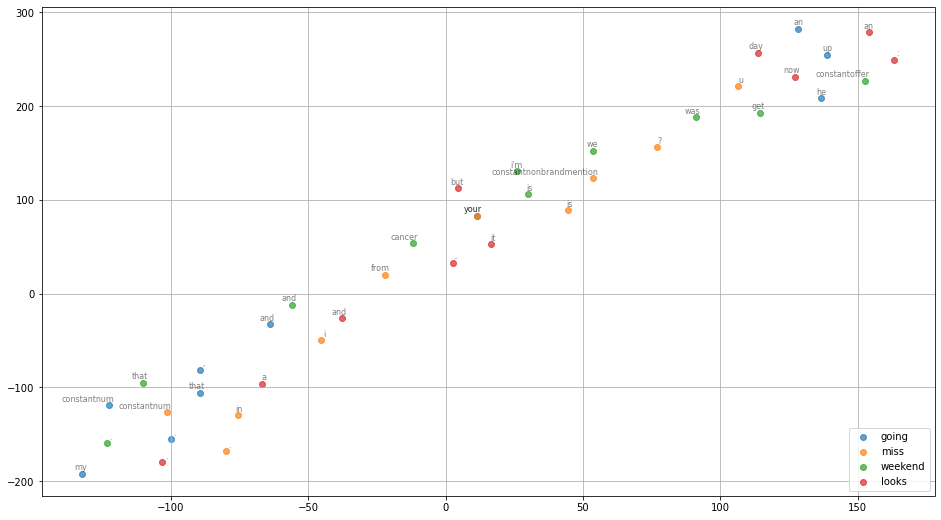

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

In [31]:
# read data
datapath = "Data/sts_gold_tweet.csv"
df = pd.read_csv(datapath, error_bad_lines=False,delimiter=";")

df = df.dropna(how='any')
df.drop(columns=['id'], inplace=True)
display(df.head())

#pre-process tweets using our package
df['tweet'] = df['tweet'].apply(lambda x: smtd_preprocessing.process_TweetText(x))
df['tweet_tokens'] = df['tweet'].apply(lambda x: tweet_tokenizer.tokenize(x))
df['tweet_no_stopwords'] = df['tweet_tokens'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
tweets_processed = df['tweet_tokens'].values
tweets_cat = df['polarity'].values

display(df.head())
print("Number of tweets and categories")
print(len(tweets_processed), len(tweets_cat))
print("\nExamle of polarity, processed tweet, processed tweet without stopwords")
print(tweets_cat[0],',',tweets_processed[0],',',df['tweet_no_stopwords'].values[0])

,polarity,tweet
0,0,the angel is going to miss the athlete this we...
1,0,It looks as though Shaq is getting traded to C...
2,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,0,drinking a McDonalds coffee and not understand...
4,0,So dissapointed Taylor Swift doesnt have a Twi...


,polarity,tweet,tweet_tokens,tweet_no_stopwords
0,0,the angel is going to miss the athlete this we...,"[the, angel, is, going, to, miss, the, athlete...","[angel, going, miss, athlete, weekend]"
1,0,it looks as though shaq is getting traded to c...,"[it, looks, as, though, shaq, is, getting, tra...","[looks, though, shaq, getting, traded, clevela..."
2,0,constantnonbrandmention constantdate isn't com...,"[constantnonbrandmention, constantdate, isn't,...","[constantnonbrandmention, constantdate, coming..."
3,0,drinking a mcdonalds coffee and not understand...,"[drinking, a, mcdonalds, coffee, and, not, und...","[drinking, mcdonalds, coffee, understanding, s..."
4,0,so dissapointed taylor swift doesnt have a twi...,"[so, dissapointed, taylor, swift, doesnt, have...","[dissapointed, taylor, swift, doesnt, twitter]"


Number of tweets and categories
2034 2034

Examle of polarity, processed tweet, processed tweet without stopwords
0 , ['the', 'angel', 'is', 'going', 'to', 'miss', 'the', 'athlete', 'this', 'weekend'] , ['angel', 'going', 'miss', 'athlete', 'weekend']


In [32]:
import time
start = time.time()
w2v_model = Word2Vec(tweets_processed,min_count=5, sg=0)
end = time.time()
print("CBOW Model Training Complete.\nTime taken for training is:{:.5f} sec ".format((end-start)))

#Create document vectors by averaging word vectors.
def embedding_feats(list_of_lists):
    DIMENSION = 100
    zero_vector = np.zeros(DIMENSION)
    feats = []
    for tokens in list_of_lists:
        feat_for_this =  np.zeros(DIMENSION)
        count_for_this = 0
        for token in tokens:
            if token in w2v_model:
                feat_for_this += w2v_model[token]
                count_for_this +=1
        feats.append(feat_for_this/count_for_this if count_for_this > 0 else feat_for_this)        
    return feats

train_vectors = embedding_feats(df['tweet_no_stopwords'].values)
print(len(train_vectors))

CBOW Model Training Complete.
Time taken for training is:0.22304 sec 
2034


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Take any classifier (LogisticRegression here)
classifier = LogisticRegression(random_state=2020)
train_data, test_data, train_cats, test_cats = train_test_split(train_vectors, 
                                                                df['polarity'].values)

classifier.fit(train_data, train_cats)
print("Accuracy: ", classifier.score(test_data, test_cats))
preds = classifier.predict(test_data)
print(classification_report(test_cats, preds))

Accuracy:  0.6699410609037328
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       341
           4       0.00      0.00      0.00       168

    accuracy                           0.67       509
   macro avg       0.33      0.50      0.40       509
weighted avg       0.45      0.67      0.54       509



# Customer Support on Social Channels

Example of actionable versus noisy messages
![alt text](https://learning.oreilly.com/library/view/practical-natural-language/9781492054047/assets/pnlp_0813.png)

The CRM pipeline:
1. Collect a labeled dataset
2. Clean it
3. Pre-process it
4. Tokenize it
5. Represent it
6. Train a model
7. Test model
8. Put it in production

# Memes and Fake News

## Memes

Memes are one of the most interesting elements that have been curated by social media users to communicate messages with fun or satire.

Two primary ways in which a meme could be indentified:

1. Content-based

Content-based meme identification uses content to match with other memes of similar patterns that have already been identified.

2. Behavior-based

Behavior-based meme identification is done mainly using the activity on the post.

## Fake News

There are some principled approaches that can be used to tackle this menace:
1. Fact verification using external data sources

Amazon Research at Cambridge created a curated dataset to deal with such cases of misinformation present in natural text. The dataset consists of examples that look like:

```
{
    "id": 78526,
    "label": "REFUTES",
    "claim": "Lorelai Gilmore's father is named Robert.",
    "attack": "Entity replacement",
    "evidence": [
        [
            [<annotation_id>, <evidence_id>, "Lorelai_Gilmore", 3]
        ]
    ]
}
```

We can use BoW-based methods to represent both the claim and the evidence and pass them as a pair through a logistic regression to obtain a classification label. More advanced techniques include using DL methods such as LSTM or pre-trained BERT to obtain encodings of these inputs. We can then concatenate these embeddings and pass it to a neural network to classify the claim

2. Classifying fake versus real

A simple setup for this problem would be to build a parallel data corpus with instances of fake and real news excerpts and classify them as real or fake. While the setup is simple, it could be very hard for a machine to solve this task reasonably well due to the fact that people may use various linguistic nuances to confuse the machine in flagging fake content.